<a href="https://www.kaggle.com/code/pmassouf/man-queen-woman?scriptVersionId=102174836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fast-text-embeddings-without-subwords/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec
/kaggle/input/fast-text-embeddings-without-subwords/crawl-300d-2M.vec/crawl-300d-2M.vec


# Table of Contents
* [What if words were vectors ?](#intro)

* [Data loading and processing](#loading)

* [Finding similar words](#sim)

* [Word Arithmetic](#arith)
    
     

<a id = "intro" ></a>
# What if words were vectors ?

*Word2vec is a technique for natural language processing published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. As the name implies, word2vec represents each distinct word with a particular list of numbers called a vector. The vectors are chosen carefully such that a simple mathematical function (the cosine similarity between the vectors) indicates the level of semantic similarity between the words represented by those vectors.* **Wikipedia**

**Our dataset contains the representation of multiple english words as vectors.**

**We can explore what the interesting consequences of viewing words as vectors are.**

<a id = "loading" ></a>
# Data loading and processing

**we read the file and then output a dict that gives the index from the word**

**a word from an index**

**a numpy array containing a word vector per word**

In [2]:
 def read_f(file):

    vects = []
    word_index, index_word = {}, {}
    i = 0
    lines = open(file)
    next(lines)
    for line in lines:
        splt = line.strip().split()
        vects.append(np.array(splt[1:], dtype=float))
        word_index[splt[0]] = i
        index_word[i] = splt[0]
        i+=1

    return word_index, index_word, vects

word_index, index_word, vects = read_f('/kaggle/input/fast-text-embeddings-without-subwords/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec')

In [3]:
vects = np.array(vects)

In [4]:
vects = np.stack(vects)

In [5]:
normalized = vects
for i in range((normalized.shape)[0]):
    normalized[i] = normalized[i]/np.linalg.norm(normalized[i],2) 

<a id = "sim" ></a>

# Finding similar words

**Let's see how vector representation can help us to find similar words**

In [6]:

def K_nearest_words_from_vector(vector, K=10):
    nearest = []
    cos_sim = np.dot(vector, normalized.T) 
    sorted_sim = cos_sim.argsort()
    for k in range(1, K+1): 
        #We select the last k elements
        index = sorted_sim[-k]
        nearest.append((index_word[index], cos_sim[index]))
    return nearest

In [7]:
def K_nearest_words_from_word(word, K=10):
    """Pour un mot 'word' donné, trouve les K plus proches voisins sémantiques"""
    index = word_index[word]
    vector = normalized[index]
    nearest = K_nearest_words_from_vector(vector)
    return nearest

In [8]:
 def show_words(closest_words):
        
        # Creating dataset
        data = map(list, zip(*closest_words))
        words = next(data)
        similarity = next(data)
        nb_words = len(words)
        x_axis = np.array([i for i in range(nb_words)])
        # Creating histogram
        fig, ax = plt.subplots(1, 1, figsize=(10,5))
        ax.bar(x_axis, np.array(similarity))

        # Set title
        ax.set_title("{} Closest words".format(nb_words))

        # adding labels
        ax.set_xlabel('Similarity rank')
        ax.set_ylabel('Similarity')

        # Make some labels.
        rects = ax.patches
        labels = words

        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                    ha='center', va='bottom')

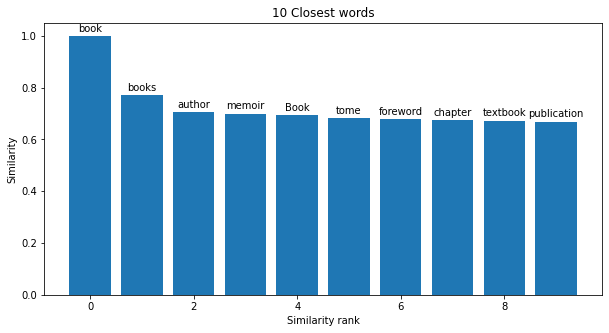

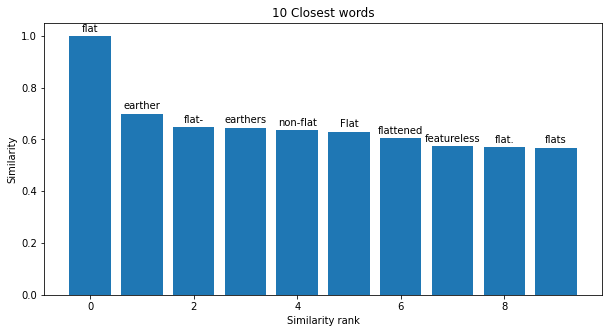

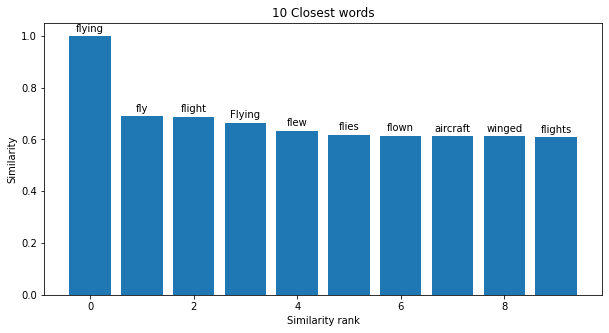

In [9]:
# Let's do some tests
show_words(K_nearest_words_from_word("book")) 
show_words(K_nearest_words_from_word("flat")) # Didn't know flat eathers were so present 
show_words(K_nearest_words_from_word("flying"))

<a id = "arith" ></a>
# Word Arithmetic

**Here we see how vector operations can bring us some interesting analogies**

In [10]:
def analogies(w1, w2, w3):
    return K_nearest_words_from_vector(normalized[word_index[w1]]+ normalized[word_index[w2]]-normalized[word_index[w3]])

**Our function creates analogies with the form : "res is to w2 as w3 is to w1"**

**For example:**

In [11]:
def get_best_analog(analogy):
    return analogy[1][0]

In [12]:
print("{} is to queen as man is to woman ".format(get_best_analog(analogies('man','queen', 'woman'))))

king is to queen as man is to woman 


**You have the answer to the title of this notebook.**

If you liked this notebook feel free to upvote it :)
